In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Homework 7

### Background on Polynomial Regression

In this homework, we will explore polynomial regression, which is a rather straightforward extension of linear regression. It can also be viewed as linear regression with engineered features, where instead of just using a feature $x$, we also use its powers $x^2,x^3,\dotsc$. This allows us to model more complex, non-linear relationships between the input features and the target variable.


Compare the following forms:

- $y = a_1x + a_2z + b$
- $y = a_1x + a_2x^2 + b$

In the second model, one of the features is a higher order power. In other words, the function that takes $x$ to $y$ is not linear; it's a polynomial. Despite this change, all methods we discussed for linear regression are still applicable, since the prediction is a linear function of the features $\{x,x^2\}$.

## Model:
Consider a polynomial regression model with features $x,x^2,\dotsc,x^M$,
$$y = a_1 x + a_2 x^2 + \dotsm+ a_M x^M + b.$$

Consider data of the form

$$\vec x = \begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_N
\end{bmatrix}, \qquad
\vec y = \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_N
\end{bmatrix}$$

We can construct the feature matrix for this model as
$$
X = \begin{bmatrix}
x_1 & x_1^2 & \dotsm & x_1^M & 1\\
x_2 & x_2^2 & \dotsm & x_2^M & 1\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
x_{N} & x_{N}^2 & \vdots & x_{N}^M & 1\\
\end{bmatrix}
$$

Then, for a given vector
$$
\vec{a} = \begin{bmatrix} a_1 \\ a_2 \\\vdots \\ a_M \\ b\end{bmatrix}
$$
of coefficients, the prediction is

$$ X \vec{a}.$$
### Optimization:
$$
\hat{\vec{a}} = \arg \min_{\vec{a}} \| \hat{y} - (X \vec{a}) \|
$$

## Problem 1: Diodes and polynomial regression
Our goal in this problem is to predict the current value for a diode (y) at given voltage values (x).

In [2]:
# data set-up variables
Is = 10**(-13) # amps
Vt = 0.025     # volts

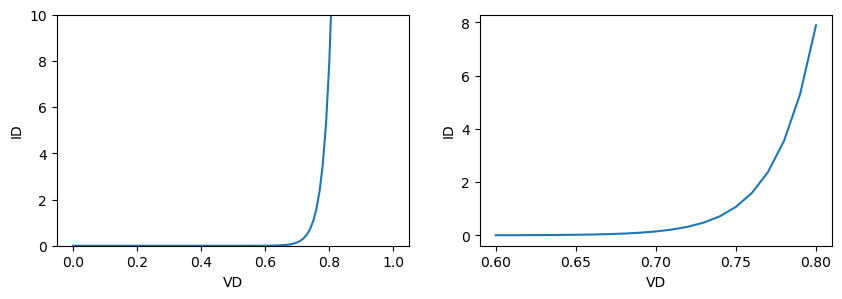

In [3]:
# create the dataset
xmin, xmax = 0, 1
npoints = 101
x = np.linspace(xmin, xmax, num=npoints)
y = Is*(np.exp(x/Vt) - 1)

# visualize the dataset
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 3))
ax1.plot(x, y)
ax1.set_ylim(0, 10)
ax1.set_xlabel('VD'); ax1.set_ylabel('ID')
# plt.savefig('hw5_diode_model0to1.png')

# zoom in on a region of interest
#xmin, xmax = 0.6, 0.8
x_int = x[60:81]
y_int = y[60:81]
ax2.plot(x_int, y_int)
ax2.set_xlabel('VD'); ax2.set_ylabel('ID')
#plt.savefig('hw3_diode_modelzoomed.png')

# reshape all the data to be columns
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
x_int = x_int.reshape(-1, 1)
y_int = y_int.reshape(-1, 1)

results for order= 1
	 loss function value is 3.86e+01
results for order= 2
	 loss function value is 1.09e+01
results for order= 3
	 loss function value is 2.02e+00
results for order= 4
	 loss function value is 2.61e-01


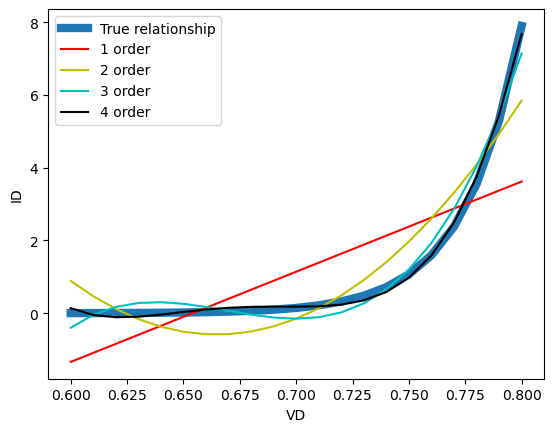

In [4]:
# TODO:
# perform polynomial regression for M = 1, 2, 3, 4 for x_int
# in each case, find SSE and plot the predicted values

# plot the true (idealized) relationship
plt.plot(x_int, y_int, label="True relationship", linewidth=6)

models = [LinearRegression() for _ in range(4)] # to store the models for use in the next part

### BEGIN SOLUTION
for colors, order in zip(['r','y','c', 'k'], [1, 2, 3, 4]):
  # create the data matrix
  A = np.hstack([x_int**p for p in range(1, order+1)])

  # do the linear regression
  lr = LinearRegression().fit(A, y_int)
  models[order-1] = lr
  a1, b1 = lr.coef_[0][0], lr.intercept_[0]
  print("results for order=", order)

  # do the prediction
  yhat = lr.predict(A)

  # update the plot
  plt.plot(x_int, yhat, c=colors, label=str(order)+ " order")

  # calculate the loss function over the training interval
  l = np.sum((yhat - y_int)**2)
  print("\t loss function value is {:.2e}".format(l))

# final plot formatting and saving
plt.xlabel("VD"); plt.ylabel("ID")
plt.legend()
#plt.savefig("hw5_diode_result_zoom.png")
plt.show()
### END SOLUTION

Which model performed better? Why do you think that was the case?



Solution: In this case, the 4th-order polynomial model performed the best since it best captures the non-linear behavior of the true relationship between V_D and I_D. In general, higher-order polynomials can represent more intricate curves, which helps in the fitting of non-linear relationships like this one. It all comes down to the nature of varying the orders of polynomials as it relates to fitting a curve. Any other higher-order polynomial could / are more likely to result in overfitting the data. Also, the lower-order polynomials (i.e. 1 to 3) did not provide sufficient fitting of the data as there is more deviation from the true relationship compared to 4th-order polynomial. Note: The window also had an impact on why the 4th-order polynomial performed the best here, caused by limiting the region of desired fitting when training.

	 loss function value is 1.01e+09
	 loss function value is 1.00e+09
	 loss function value is 1.00e+09
	 loss function value is 1.30e+09


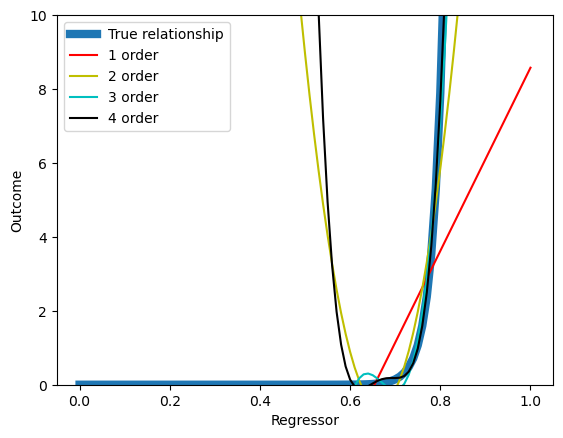

In [9]:
# TODO: Train the 4 models as in the previous part on x_int (or reuse the trained models).
# But this time, produce and plot predictions for the whole range (x). Find the loss for the full range.


### BEGIN SOLUTION
# plot the true relationship
plt.plot(x, y, label="True relationship",linewidth=6)

for colors, order in zip(['r','y','c', 'k'], [1, 2, 3, 4]):
  # create the data matrix
  A = np.hstack([x**p for p in range(1, order+1)])
  lr = models[order-1]
  yhat = lr.predict(A)

  # update the plot
  plt.plot(x, yhat, c=colors, label=str(order)+ " order")

  # calculate the loss function over the training interval
  l = np.sum((yhat - y)**2)
  print("\t loss function value is {:.2e}".format(l))

# final plot formatting and saving
plt.xlabel("Regressor"); plt.ylabel("Outcome")
plt.legend()
#plt.savefig("hw5_diode_result.png")
plt.ylim(0, 10)
plt.show()
### END SOLUTION

What happens when a model is used outside of the region it was trained?



Solution: Outside the training region, polynomial models tend to become unreliable and inaccurate predictions of the data. Higher-order models (i.e. 3rd & 4th orders) show fluctuations which deviates significantly from the true relationship. This behavior happens because polynomial models, especially higher-order ones, are "highly sensitive" (unstable) and "unpredictable" when applied beyond the data they were trained on -> extrapolation.

Which model do you recommend? Why?



Solution: Determining which model to recommend comes down to the region of interest. For instance, within the training region, it was recommended to use the 4th-order polynomial model because it best captures the non-linear behavior of the true relationship. However, for predictions outside this region (in this case), a simpler model such as the 2nd order would be more reliable, as they are less prone to unstable behavior. Overall, high-order models fit well within the known range but become unreliable for extrapolation, where simpler models tend to behave more predictably.

# Problem 2: Polynomial regression and size of data
The code for this problem is given. Run it for different values of `ndata` from 4 to 400. Which order do you think performs better for small amount of data? Which ones perform better for large amounts of data? Explain why this is the case?

In [15]:
# load the data
dtafile = './els_small.dta'
df = pd.read_stata(dtafile)
df.tail() # print out the last rows of the dataframe
df = df[pd.to_numeric(df['bymath'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['byread'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['byses'], errors='coerce').notnull()]
mathscore = np.array(list(df.bymath.values), dtype=float)
readscore = np.array(list(df.byread.values), dtype=float)
mathscore = mathscore.reshape(-1,1)
readscore = readscore.reshape(-1,1)


results for order= 1
	 loss function value is 976.73
	 validation loss function value is 88.29
results for order= 2
	 loss function value is 974.17
	 validation loss function value is 84.63
results for order= 4
	 loss function value is 954.82
	 validation loss function value is 82.06
results for order= 6
	 loss function value is 949.44
	 validation loss function value is 84.56


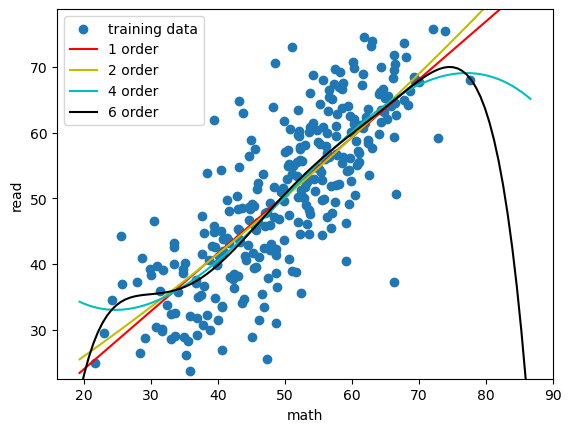

In [64]:
x = mathscore
y = readscore

# set how many data points we want to use for training
ndata = 300

# get the indeces with unique mathscores so that we can fit a function
# (we cannot have a function that has the same x value yield two different y values)
inds = np.unique(np.hstack([readscore,mathscore])[:,0], return_index=True)[1]
inds = np.sort(inds)

# set up our training data
xtrain = x[inds][0:ndata]
ytrain = y[inds][0:ndata]
plt.scatter(xtrain, ytrain, label="training data")

# TODO: add validation data
nval = 10
xval = x[inds][ndata:(ndata+nval)]
yval = y[inds][ndata:(ndata+nval)]
#plt.scatter(xval, yval, label="validation data")

# make up some "test" data for plotting more smoothly (result of prediction)
xplot = np.linspace(np.min(mathscore), np.max(mathscore), 100).reshape(-1,1)

for colors, order in zip(['r','y','c', 'k'], [1,2,4,6]): #)[1, 2, 3, 4]):
  # create the data matrix
  A = np.hstack([xtrain**p for p in range(1, order+1)])
  # do the linear regression
  lr = LinearRegression().fit(A, ytrain)
  a1, b1 = lr.coef_[0][0], lr.intercept_[0]
  print("results for order=", order)

  # calculate the loss function over the training interval
  l = np.sum((lr.predict(A) - ytrain)**2)/np.sqrt(len(ytrain))
  print("\t loss function value is {:.2f}".format(l))

  # TODO: calculate the loss function for validation data
  Aval = np.hstack([xval**p for p in range(1, order+1)])
  l = np.sum((lr.predict(Aval) - yval)**2)/len(yval)
  print("\t validation loss function value is {:.2f}".format(l))

  # do the prediction and update the plot
  Aplot = np.hstack([xplot**p for p in range(1, order+1)])
  yplot = lr.predict(Aplot)
  plt.plot(xplot, yplot, c=colors, label=str(order)+ " order")

# final plot formatting and saving
plt.xlabel("math"); plt.ylabel("read")
plt.legend()
plt.ylim((np.min(readscore), np.max(readscore)))
plt.show()

For smaller amounts of data, it is better to fit lower orders of polynomials. We can see that in this case, although the loss function value decreases by increasing the order, the validation loss function value increases quite fast due to overfitting.

For larger amounts of data, we can use higher oreders of polynomials to fit, since we know more about the patterns in the data. For example, for $n=300$, a polynomial of the 4th order has the smallest validation loss function value.